In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import date
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [2]:
original_df=pd.read_csv("E:\Tech notes\Data analyst portfolio\DA Project\Internship Project at Navodita Infotech\marketing_campaign.csv")
original_df.head(5).style.background_gradient(cmap="Greens")

In [3]:
df=original_df.copy()
df.head().style.background_gradient(cmap='Greens')

In [4]:
#shape
df.shape

(2240, 29)

In [5]:
#column name
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
#summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
#memory usage in megabyte
memory_usage=df.memory_usage(deep=True)/1024
print("features:",memory_usage)
print("total memory:",memory_usage.sum())

features: Index                    0.128906
ID                      17.500000
Year_Birth              17.500000
Education              141.134766
Marital_Status         140.160156
Income                  17.500000
Kidhome                 17.500000
Teenhome                17.500000
Dt_Customer            146.562500
Recency                 17.500000
MntWines                17.500000
MntFruits               17.500000
MntMeatProducts         17.500000
MntFishProducts         17.500000
MntSweetProducts        17.500000
MntGoldProds            17.500000
NumDealsPurchases       17.500000
NumWebPurchases         17.500000
NumCatalogPurchases     17.500000
NumStorePurchases       17.500000
NumWebVisitsMonth       17.500000
AcceptedCmp3            17.500000
AcceptedCmp4            17.500000
AcceptedCmp5            17.500000
AcceptedCmp1            17.500000
AcceptedCmp2            17.500000
Complain                17.500000
Z_CostContact           17.500000
Z_Revenue               17.500000
Resp

In [8]:
#Statistics
df.describe().style.background_gradient(cmap='Greens')

In [9]:
#All columns statics
df.describe(include='all').style.background_gradient(cmap='Greens')

In [10]:
#missing value
df.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

<Axes: >

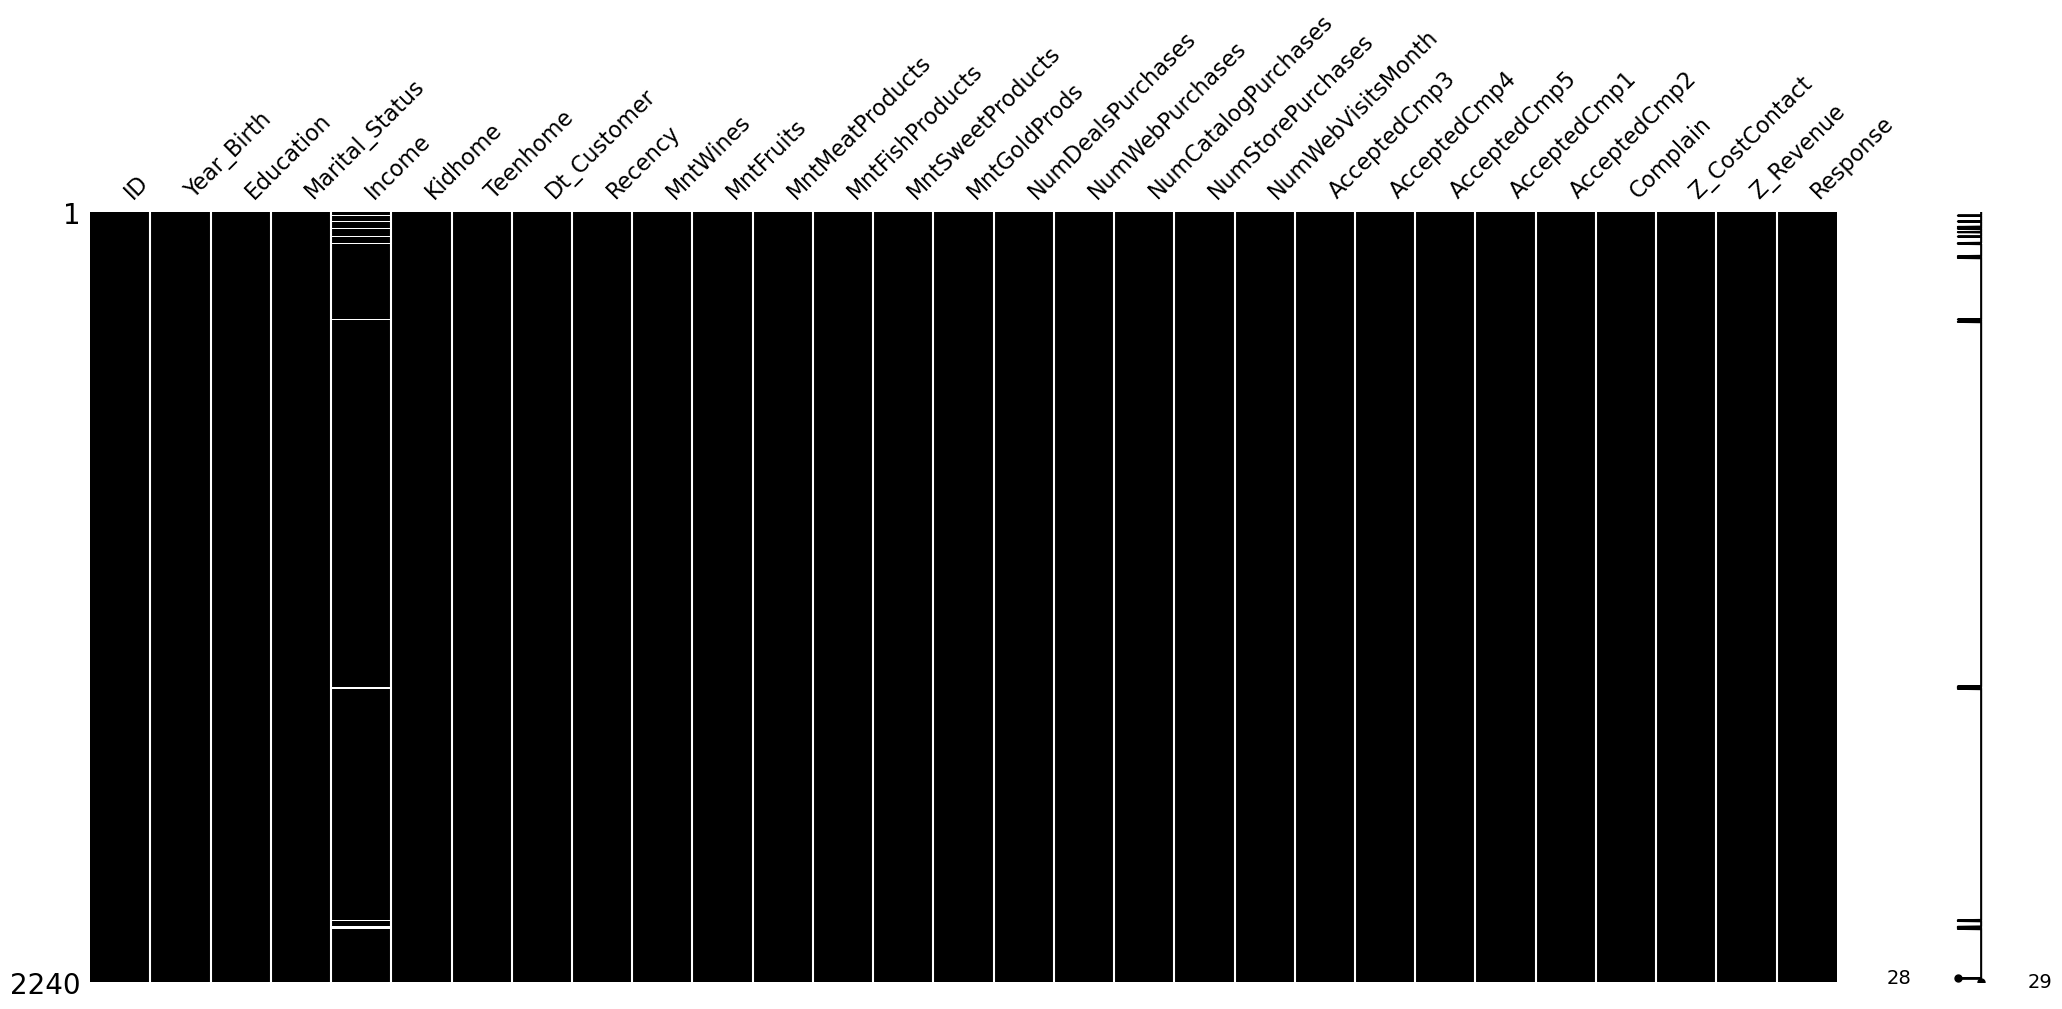

In [11]:
#missing visuals
import missingno as mn
mn.matrix(df,color=(0,0,0))

In [12]:
#fill missing vale with median
df['Income']=df['Income'].fillna(df['Income'].median())


In [13]:
#Check if any missing value
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [14]:
#No missing value found

In [15]:
#check for dulicate
df[df.duplicated()]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

In [16]:
#find number of unique value in each columns
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [17]:
#columns "Z_costcontact" and "Z_revenue" have same value so drop it cuz - no use 
df=df.drop(columns=["Z_CostContact","Z_Revenue"],axis=0)


In [18]:
df.head().style.background_gradient(cmap='Greens')

In [19]:
#UNIVARAITE ANALYSIS


In [20]:
#Unique category in "Year_Birth" column
df['Year_Birth'].value_counts()

1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64

In [21]:
#uique of "Education" column
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [22]:
#changeing education category into UG and PgG only
df['Education']=df['Education'].replace(['PhD','2n Cycle', 'Graduation','Master'],'Post Graduate')
df['Education']=df['Education'].replace(['Basic'],'Under Graduate')

In [23]:
#unique category in education
df['Education'].value_counts()

Post Graduate     2186
Under Graduate      54
Name: Education, dtype: int64

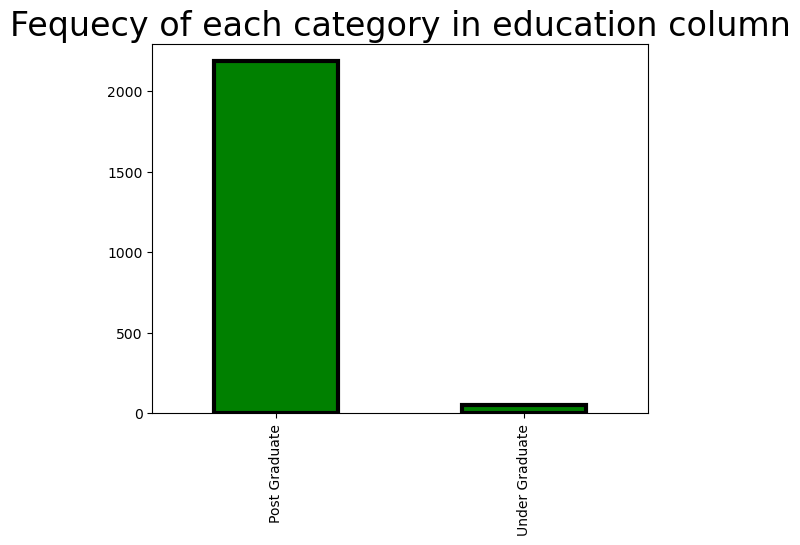

<Figure size 800x800 with 0 Axes>

In [24]:
#visualizing the Education column
df['Education'].value_counts().plot(kind='bar',color='Green',edgecolor='Black',linewidth=3)
plt.title('Fequecy of each category in education column',fontsize=24)
plt.figure(figsize=(8,8))
plt.show()

In [25]:
#97.5% of customer is pg and 2.4% of the customer is ug

In [26]:
#unique of the martial status
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [27]:
#replace category of the martial status with relationship and single
df['Marital_Status']=df['Marital_Status'].replace(['Married','Together'],'Relationship')
df['Marital_Status']=df['Marital_Status'].replace(['Divorced','Widow','Alone','YOLO','Absurd'],'Single')

In [28]:
df['Marital_Status'].value_counts()

Relationship    1444
Single           796
Name: Marital_Status, dtype: int64

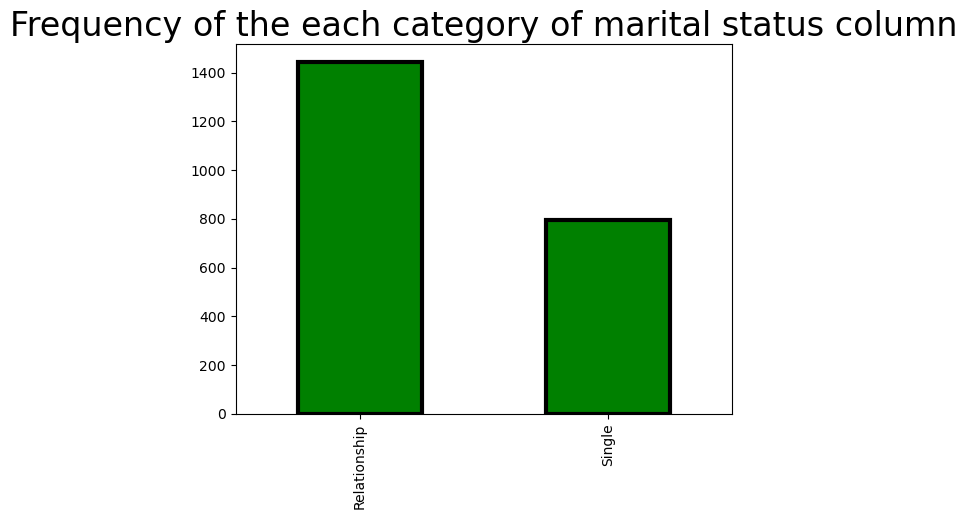

<Figure size 800x800 with 0 Axes>

In [29]:
df['Marital_Status'].value_counts().plot(kind='bar',color='Green',edgecolor='Black',linewidth=3)
plt.title('Frequency of the each category of marital status column',fontsize=24)
plt.figure(figsize=(8,8))
plt.show()

In [30]:
#64.4% of customer is in relationship and 35.5% of the customer is single


In [31]:
#Income analysis
df['Income'].max()

666666.0

In [32]:
df['Income'].min()

1730.0

In [33]:
df['Income'].mean()

52237.97544642857

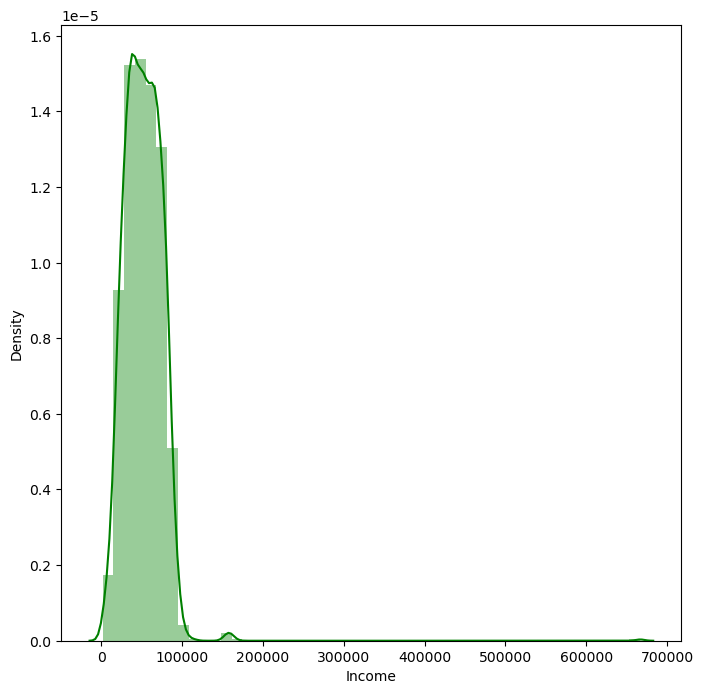

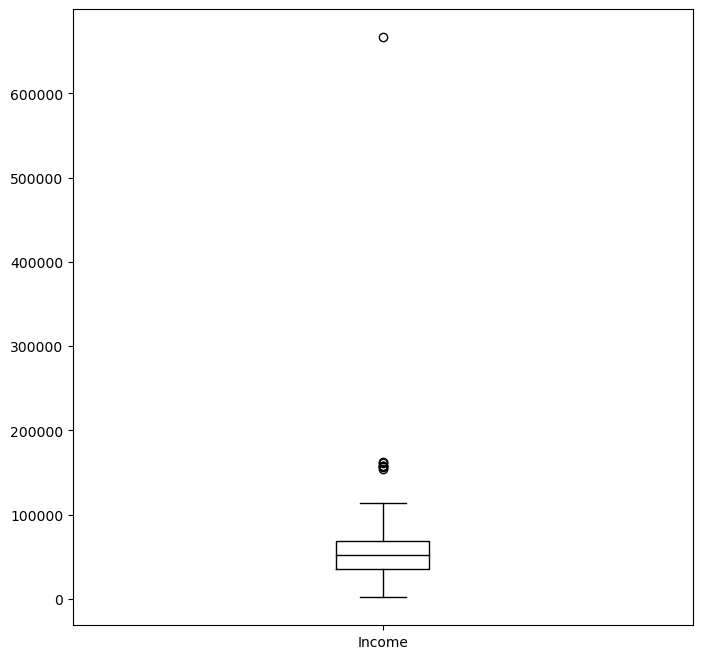

In [34]:
#Visual of Income
plt.figure(figsize=(8,8))
sns.distplot(df["Income"],color = 'Green')
plt.show()
df["Income"].plot.box(figsize=(8,8),color = 'Black')
plt.show()

In [35]:
#analysis on kidhome and teenhome
df['Kidhome'].unique()


array([0, 1, 2], dtype=int64)

In [36]:
df['Teenhome'].unique()

array([0, 1, 2], dtype=int64)

In [37]:
#combine both columns
df['Kids']=df['Kidhome']+df['Teenhome']

In [38]:
#unique of the Kids column
df['Kids'].unique()

array([0, 2, 1, 3], dtype=int64)

In [39]:
#number of unique in kids columns
df['Kids'].value_counts()

1    1128
0     638
2     421
3      53
Name: Kids, dtype: int64

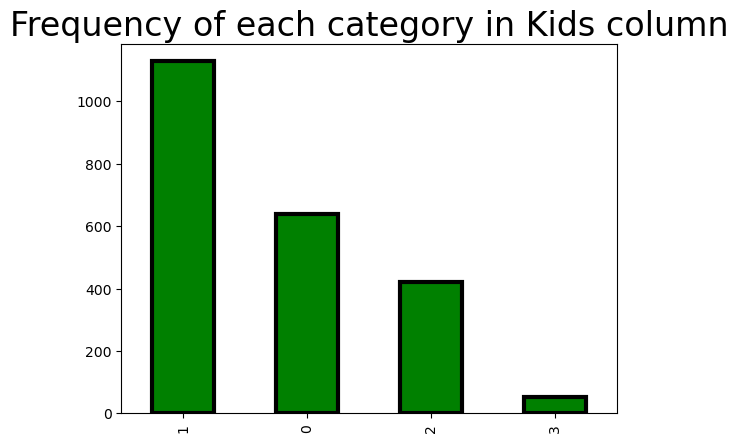

<Figure size 800x800 with 0 Axes>

In [40]:
#visual of kids column
df['Kids'].value_counts().plot(kind='bar',color='Green',edgecolor='Black',linewidth=3)
plt.title('Frequency of each category in Kids column',fontsize=24)
plt.figure(figsize=(8,8))
plt.show()

In [41]:
#50.3% of customer have 1 kid
#28.4% of the customer have no kid
#18.7% of the customer have 2 kids and
#2.3% of the customer have 3 kids

In [42]:
#Analysis On "MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds" Variable.

In [43]:
df['MntWines'].unique()

array([ 635,   11,  426,  173,  520,  235,   76,   14,   28,    5,    6,
        194,  233,    3, 1006,   53,   84, 1012,    4,   86,    1,  867,
        384,  270,   36,  684,    8,  112,  110,   96,  482,   40,  702,
         55,  437,  421,   13,    9,   81,  123,   48,  826,  245,  650,
         12,  510,  328,  984,  295,  447,  712,  452,  523,  546,  398,
         10,  688,  247,  856,  496,   25,  258,  565,    2,  721, 1032,
        577,   64,  163,   17,  130,  292,  350,  135,  230,    7,  445,
         15,   27,  505,   51,  207,   41,  386,  562,  217,  144,  454,
        425, 1332,  527,  490,  378,  547,   47,  320,   34,  722,  162,
        450,   70,  352,  492,  120,  534,  236,  231,  220,  796,    0,
        962,  738,  399,  614,   32,  598,   73,   42,  346,  888,  997,
        212,  536, 1349, 1001,   20,   18,  125,  277,   85,   59, 1149,
        847,   29,  152,  620,   35,  356,  783,  466,   23,  656,  519,
        344,  448,  265,  587,  763,   22,   54, 11

In [44]:
df['MntFruits'].unique()

array([ 88,   1,  49,   4,  43,  42,  65,  10,   0,   5,  16,  61,   2,
        14,  22,  80,  17,   3, 100,  12,  34,   8,  76,  11, 164,  18,
         6,  50,  19,  37, 120,   9,  51,  35,  26,   7,  40,  59,  36,
       107, 111, 105,  23,  60,  46, 172,  81, 106, 194, 115,  44,  99,
        90,  48,  27,  33, 133,  58,  28,  21,  20, 162,  71,  66,  30,
       189, 138,  29,  24,  32,  86, 114, 153,  64, 134, 148,  47,  41,
        84,  74, 129,  15,  98, 183, 147, 144, 104,  91, 163, 152,  53,
        68, 137, 190,  38,  70,  96,  25,  13,  83,  92,  73, 155,  54,
       151,  85, 127,  63,  45, 103,  69,  89, 181, 112, 159, 102, 123,
       166, 142,  79,  39,  31, 178,  93,  97, 168, 174, 122, 199,  62,
        55, 101,  67, 117, 108,  57, 130, 161,  56, 124, 126,  75, 185,
        72,  87, 197,  82, 184, 160,  77, 140, 131, 132, 169, 193, 149,
       143, 154], dtype=int64)

In [45]:
df['MntFishProducts'].unique()

array([172,   2, 111,  10,  46,   0,  50,   3,   1,  11, 225,   6,  59,
       150,  30,  69,  21,  39,  15,  20,  34,  33, 119, 160,  82, 227,
        37,  27, 156,  12, 180, 121,  16, 201,   7,  58, 189,  17,  84,
         4,  97, 137, 110,  49,  98,  75,  65, 185,  80,  31,  23,  29,
       151, 123,  44,  40, 173,  38,  52,  13,  36,  43,  73,  32,   8,
        19, 149, 134,  86, 140, 147, 224,  42,  76,  47, 254,  25,  67,
        28, 186, 218, 104, 133, 220,  45,  24, 205, 162,  95, 101, 188,
        55, 166, 216,  60, 219,  77,  78,  72, 212, 129,  93,  99, 102,
       179,  61,  62, 197, 199, 120, 169, 240,  63,  91, 106, 146,  56,
       127, 136, 168,  54, 132,  71,  64, 231,  85, 202,  41, 125,  26,
       175, 164, 177, 138, 247, 159, 153,  90,  51, 234,  68, 210,  89,
       194, 250, 237, 145, 167,  48, 192, 130, 232, 116, 184, 158,  94,
       259, 115, 207, 112, 182, 141, 124, 171, 193, 242, 246,  35, 142,
       253, 258, 198, 223,   5, 103, 108, 181,  81, 128, 208, 11

In [46]:
df['MntSweetProducts'].unique()

array([ 88,   1,  21,   3,  27,  42,  49,   2, 112,   5,  68,  13,  12,
        16,  24,  38,   0,  32,   6, 263,  66,  22,   8,   7, 178,  30,
        10,  67, 167,  40, 120,  18,  14, 122,  82,  29,  60,   4,  37,
        15, 105,  65, 133,  28,  61, 132,  26,  98,  35,  51,  20, 103,
         9,  72,  89,  41,  71,  44,  33,  11,  91,  76,  17, 113,  19,
       173,  23,  87, 176, 102,  48, 138, 163, 124,  70, 172,  84, 149,
        73,  92, 130,  25,  74, 114, 141,  54, 147,  45,  50,  46,  97,
        64, 118, 153, 189, 107, 128, 134,  36, 150,  78, 137,  34,  95,
       156,  47, 194,  96, 191, 192,  75,  62,  58, 129,  31,  57, 108,
       123, 185, 121, 127, 125, 198,  43, 115,  80, 106, 101, 110,  83,
       160, 166, 136,  56, 116, 182, 148, 161,  69, 157,  55, 143, 169,
        86, 146,  59, 152,  77,  53,  39,  93, 151,  99, 144, 195,  63,
       175, 145, 162, 187, 126,  85, 109, 197, 165, 174, 196,  81, 139,
       188, 142,  94, 262, 179, 100,  79, 111], dtype=int64)

In [47]:
df['MntGoldProds'].unique()

array([ 88,   6,  42,   5,  15,  14,  27,  23,   2,  13,   1,  16,  30,
        45,   4,  28, 176,  39,  48,  19,  99,  41, 362,  10,   0,  89,
         3,  43,  22,  35,  36, 102,   7,  12, 174,  50,  38,  32, 241,
       109, 190,  40,  80, 169,  73,  17,  86,   9,  18,  51,  76,  34,
       145,  53,  75, 223,  11, 111,  81,  65,  79,  60,  72,  33, 120,
       168, 172, 216,  58, 130, 124,  20, 126, 116,  49,   8,  91,  57,
        26, 141, 117,  25,  92,  54,  21, 192,  44,  66, 182, 181, 152,
        77,  70, 148,  24,  69, 146, 162, 131,  74, 135, 203,  52,  63,
        61, 139, 122, 224, 173, 218,  93, 142,  29, 233, 101, 157,  55,
       107, 159,  78, 110, 125, 114,  68, 191,  95,  37,  64,  46, 119,
        90, 134, 108, 153,  84,  59,  31, 175,  85,  71,  47, 118,  83,
       106, 165, 163, 144, 147, 207, 151, 154, 115,  67, 242, 155, 249,
       183, 170,  97, 227, 121, 205, 112, 198, 177, 133,  94,  56,  82,
       187, 171,  98, 129,  96, 166, 195, 231, 158, 123, 200, 17

In [48]:
#combining all as expenses
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Expenses'].head()

0    1617
1      27
2     776
3      53
4     422
Name: Expenses, dtype: int64

In [49]:
df['Expenses'].max()

2525

In [50]:
df['Expenses'].min()

5

In [51]:
df['Expenses'].mean()

605.7982142857143

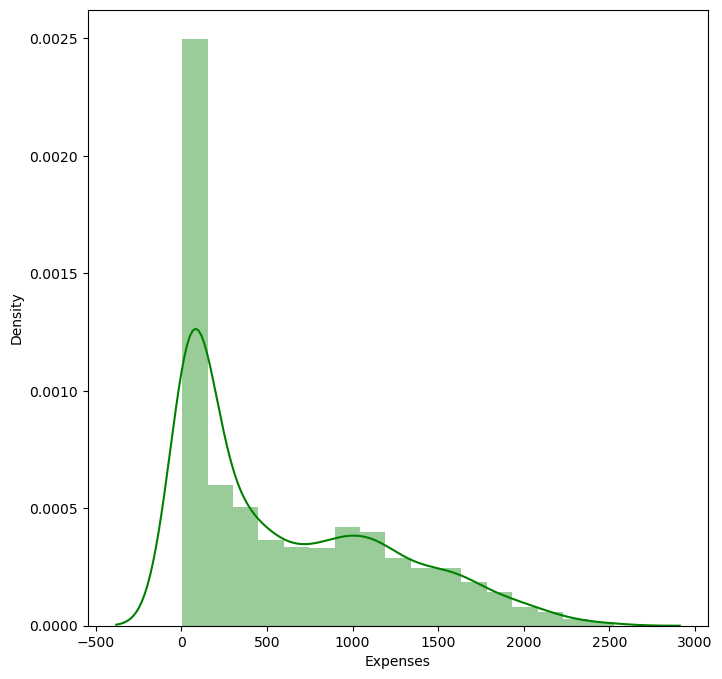

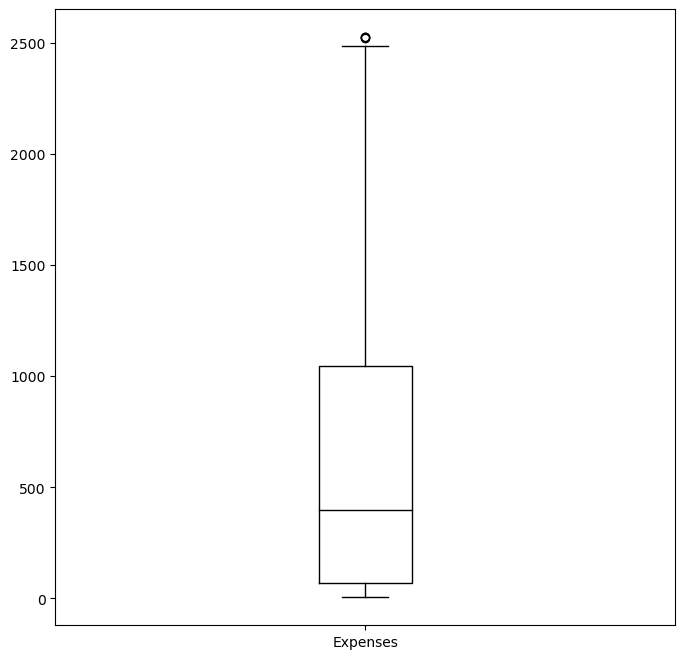

In [52]:
plt.figure(figsize=(8,8))
sns.distplot(df['Expenses'],color='Green')
plt.show()
df['Expenses'].plot.box(figsize=(8,8),color='Black')
plt.show()

In [53]:
#Analysis on "AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5" Variable.

In [54]:
df['AcceptedCmp1'].unique()

array([0, 1], dtype=int64)

In [55]:
df['AcceptedCmp2'].unique()

array([0, 1], dtype=int64)

In [56]:
df['AcceptedCmp3'].unique()

array([0, 1], dtype=int64)

In [57]:
df['AcceptedCmp4'].unique()

array([0, 1], dtype=int64)

In [58]:
df['AcceptedCmp5'].unique()

array([0, 1], dtype=int64)

In [59]:
df['TotalAcceptedCmp']=df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [60]:
#count
df['TotalAcceptedCmp'].value_counts()

0    1777
1     325
2      83
3      44
4      11
Name: TotalAcceptedCmp, dtype: int64

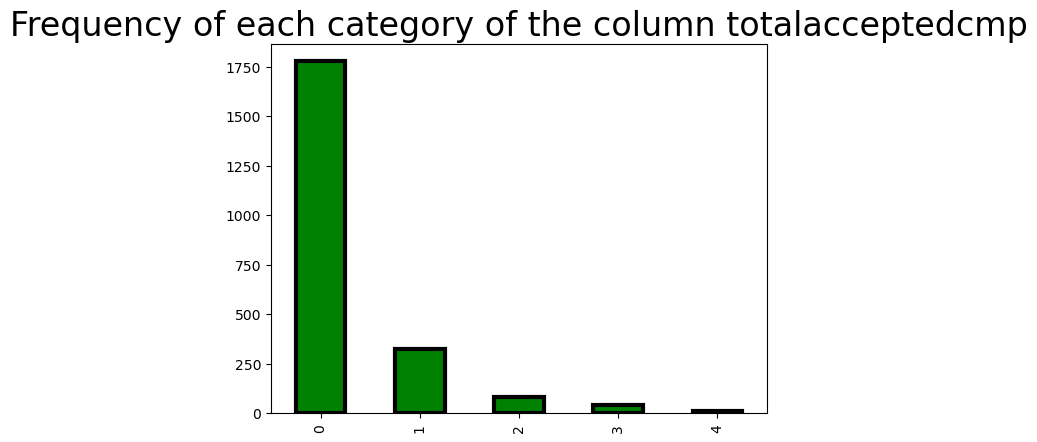

<Figure size 800x800 with 0 Axes>

In [61]:
#visual
df['TotalAcceptedCmp'].value_counts().plot(kind='bar',color='Green',edgecolor='Black',linewidth=3)
plt.title('Frequency of each category of the column totalacceptedcmp',fontsize=24)
plt.figure(figsize=(8,8))
plt.show()

In [62]:
#Customer accepted offer in Campaign 0 = 79.33%
#Customer accepted offer in Campaign 1 = 14.5%
#Customer accepted offer in Campaign 2 = 3.7%
#Customer accepted offer in Campaign 3 = 1.9%
#CCustomer accepted offer in Campaign 4 = 0.4%

In [63]:
#Analysis on "NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases" Variable.

In [64]:
df['NumWebPurchases'].unique()

array([ 8,  1,  2,  5,  6,  7,  4,  3, 11,  0, 27, 10,  9, 23, 25],
      dtype=int64)

In [65]:
df['NumCatalogPurchases'].unique()

array([10,  1,  2,  0,  3,  4,  6, 28,  9,  5,  8,  7, 11, 22],
      dtype=int64)

In [66]:
df['NumStorePurchases'].unique()

array([ 4,  2, 10,  6,  7,  0,  3,  8,  5, 12,  9, 13, 11,  1],
      dtype=int64)

In [67]:
df['NumDealsPurchases'].unique()

array([ 3,  2,  1,  5,  4, 15,  7,  0,  6,  9, 12,  8, 10, 13, 11],
      dtype=int64)

In [68]:
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
df['NumTotalPurchases'].unique()

array([25,  6, 21,  8, 19, 22, 10,  2,  4, 16, 15,  5, 26,  9, 13, 12, 43,
       17, 20, 14, 27, 11, 18, 28,  7, 24, 29, 23, 32, 30, 37, 31, 33, 35,
       39,  1, 34,  0, 44], dtype=int64)

In [69]:
df['NumTotalPurchases'].max()

44

In [70]:
df['NumTotalPurchases'].min()

0

In [71]:
df['NumTotalPurchases'].mean()

14.862053571428572

<Figure size 800x800 with 0 Axes>

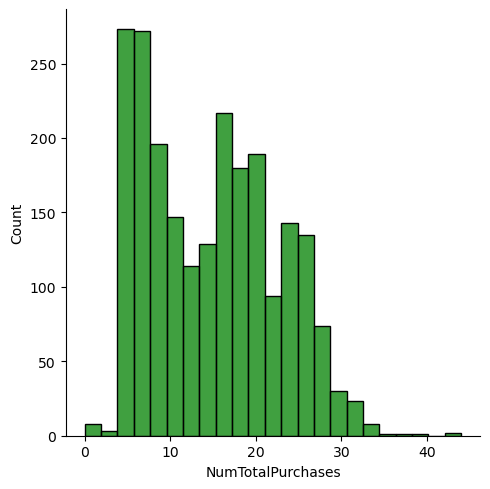

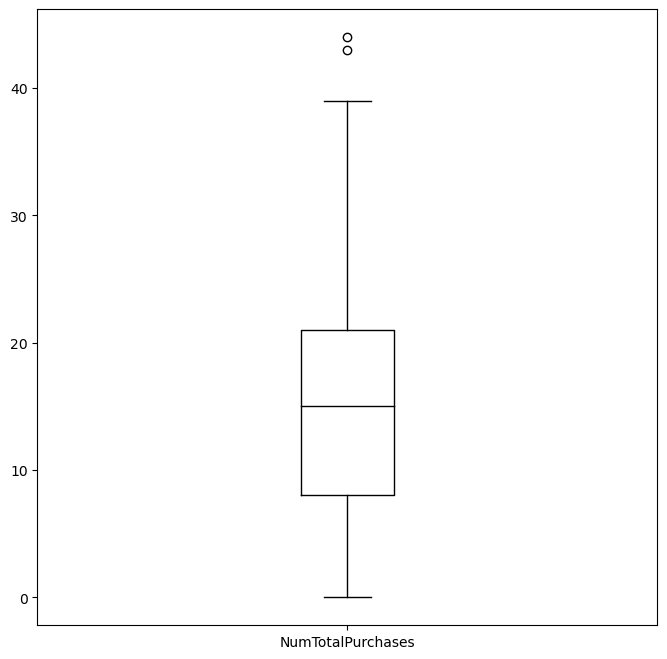

In [72]:
plt.figure(figsize=(8,8))
sns.displot(df['NumTotalPurchases'],color='Green')
plt.show()
df['NumTotalPurchases'].plot.box(figsize=(8,8),color='Black')
plt.show()

In [73]:
#deleting some of the columns
df=df.drop(columns=["ID","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"],axis=1)
df.head(10).style.background_gradient(cmap='Greens')

In [74]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Dt_Customer',
       'Recency', 'Complain', 'Response', 'Kids', 'Expenses',
       'TotalAcceptedCmp', 'NumTotalPurchases'],
      dtype='object')

In [75]:
a=df.columns
for i in a:
    print(i)

Year_Birth
Education
Marital_Status
Income
Dt_Customer
Recency
Complain
Response
Kids
Expenses
TotalAcceptedCmp
NumTotalPurchases


In [76]:
#change dt-customer into timestamp format
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)
df['First_day'] = '01-01-2015'
df['First_day'] = pd.to_datetime(df.First_day)
df['Day_engaged'] = (df['First_day'] - df['Dt_Customer']).dt.days

In [77]:
# new column age
df['Customer Tenure']=(pd.Timestamp('now').year)-(pd.to_datetime(df['Dt_Customer']).dt.year)

In [78]:
#unique category in age column
df['Customer Tenure'].value_counts()

11    1189
10     557
12     494
Name: Customer Tenure, dtype: int64

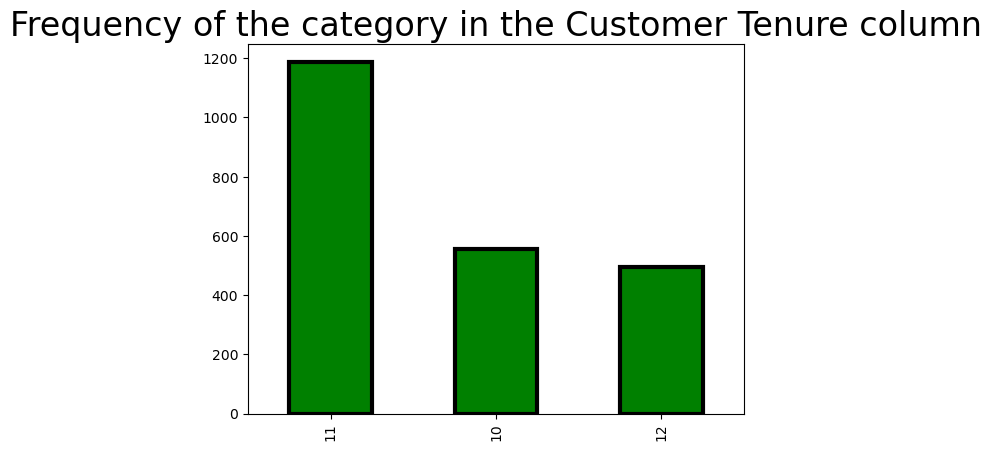

<Figure size 800x800 with 0 Axes>

In [79]:
#visual of the Age column
df['Customer Tenure'].value_counts().plot(kind='bar',color='Green',edgecolor='Black',linewidth=3)
plt.title('Frequency of the category in the Customer Tenure column',fontsize=24)
plt.figure(figsize=(8,8))
plt.show()

In [80]:
# 53% of customer are connected from last 11 years 
# 24.8% of customer are connected from last 10 years 
# 22% of customer are connected from last 12 years 

In [81]:
df.head().style.background_gradient(cmap='Greens')

In [82]:
df=df.drop(columns=["Dt_Customer", "First_day", "Year_Birth", "Dt_Customer", "Recency", "Complain","Response"],axis=1)
df.head(5).style.background_gradient(cmap='Greens')

In [83]:
#Arrange the column order
order = [0,1,3,4,6,7,8,2,5]
df = df[[df.columns[i] for i in order]]
df.head(5).style.background_gradient(cmap='Greens')

In [84]:
df.shape

(2240, 9)

In [85]:
b=df.columns
for i in b:
    print(i)

Education
Marital_Status
Kids
Expenses
NumTotalPurchases
Day_engaged
Customer Tenure
Income
TotalAcceptedCmp


In [86]:
#BIVARIATE ANALYSIS

In [87]:
# Eduction Vs Expenses
pd.crosstab(df['Education'],df['Expenses'],margins=True).style.background_gradient(cmap='Greens')

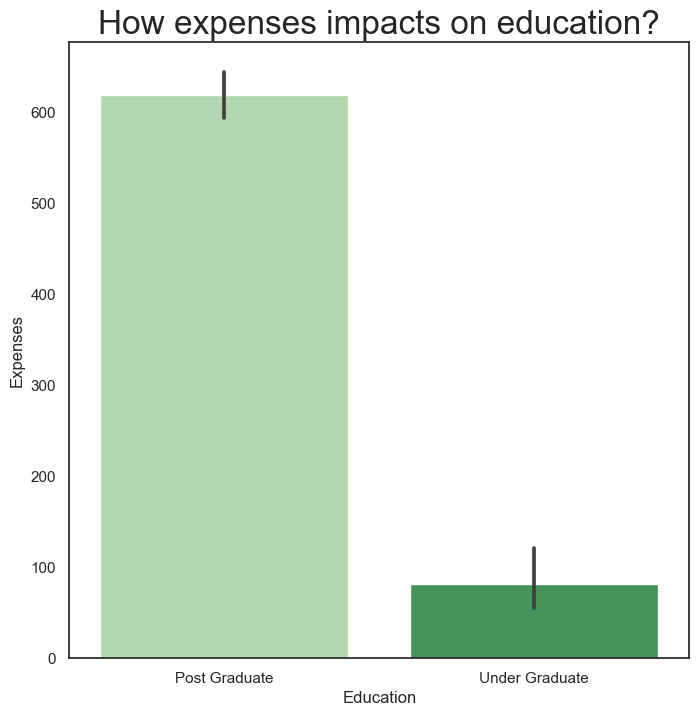

In [88]:
sns.set_theme(style='white')
plt.figure(figsize=(8,8))
plt.title('How expenses impacts on education?',fontsize=24)
ax=sns.barplot(x='Education',y='Expenses',data=df,palette='Greens')

In [89]:
# marital Status Vs Expenses

In [90]:
pd.crosstab(df['Marital_Status'],df['Expenses'],margins=True).style.background_gradient(cmap='Greens')

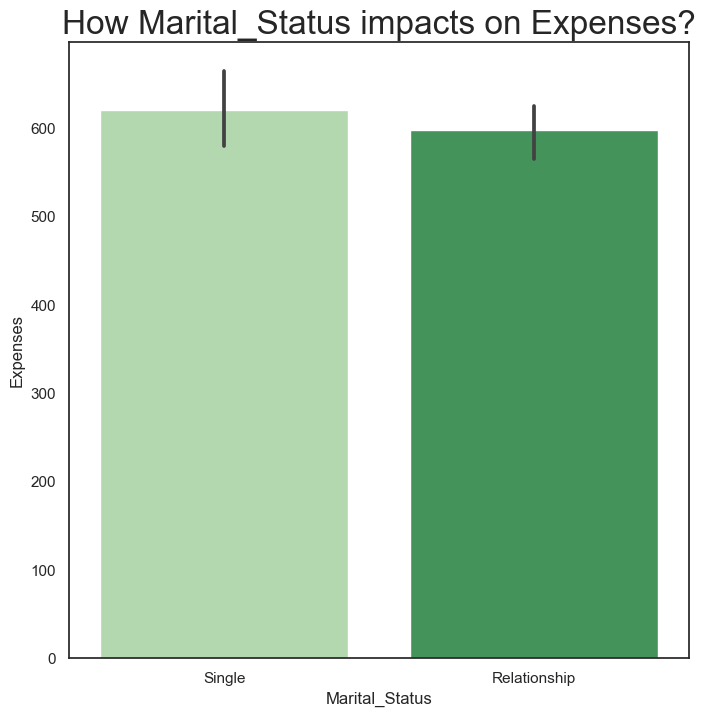

In [91]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Marital_Status impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Marital_Status", y="Expenses", data=df,palette="Greens")

In [92]:
#Kids Vs Expenses

In [93]:
pd.crosstab(df['Kids'],df['Expenses'],margins=True).style.background_gradient(cmap='Greens')

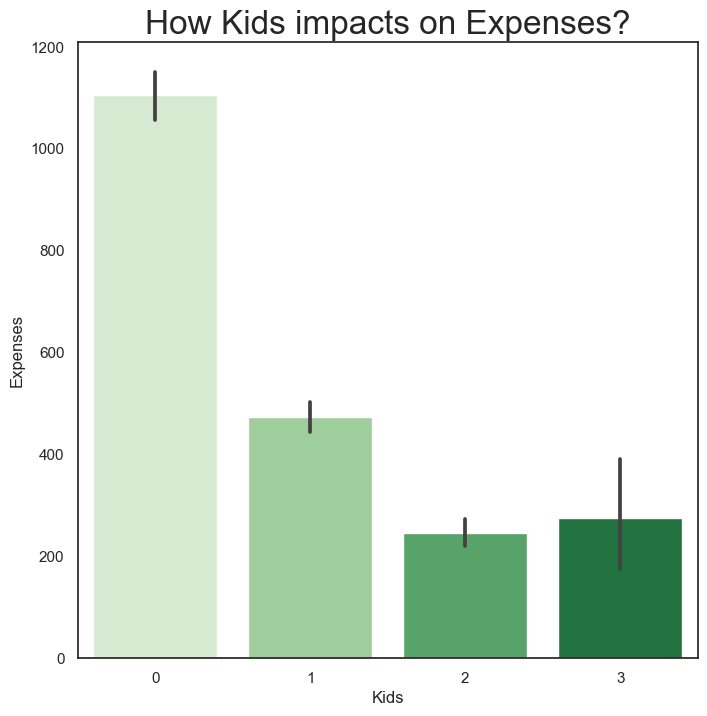

In [94]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Kids impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Kids", y="Expenses", data=df,palette="Greens")

In [95]:
# TotalAcceptedCmp Vs Expenses

In [96]:
pd.crosstab(df['TotalAcceptedCmp'],df['Expenses'],margins=True).style.background_gradient(cmap='Greens')

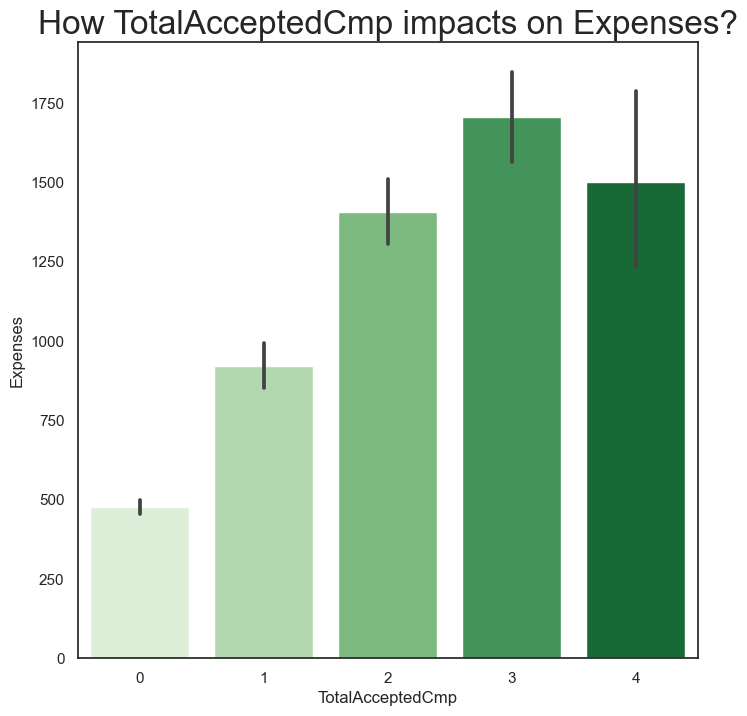

In [97]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How TotalAcceptedCmp impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="TotalAcceptedCmp", y="Expenses", data=df,palette="Greens")

In [98]:
pd.crosstab(df['NumTotalPurchases'],df['Expenses'],margins=True).head().style.background_gradient(cmap='Greens')

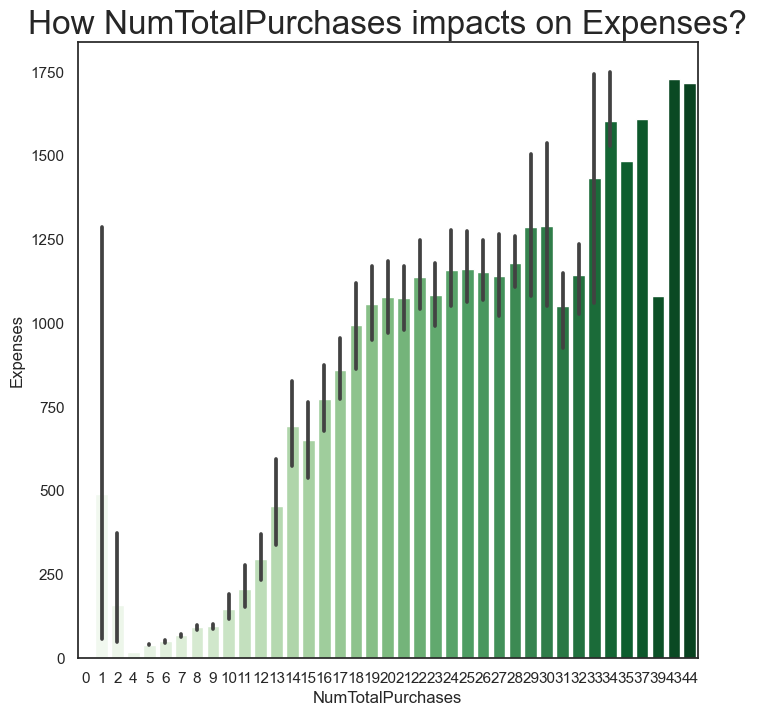

In [99]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How NumTotalPurchases impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="NumTotalPurchases", y="Expenses", data=df,palette="Greens")

In [100]:
# day engaged Vs Expenses

In [101]:
pd.crosstab(df['Day_engaged'],df['Expenses'],margins=True).head(10).style.background_gradient(cmap='Greens')

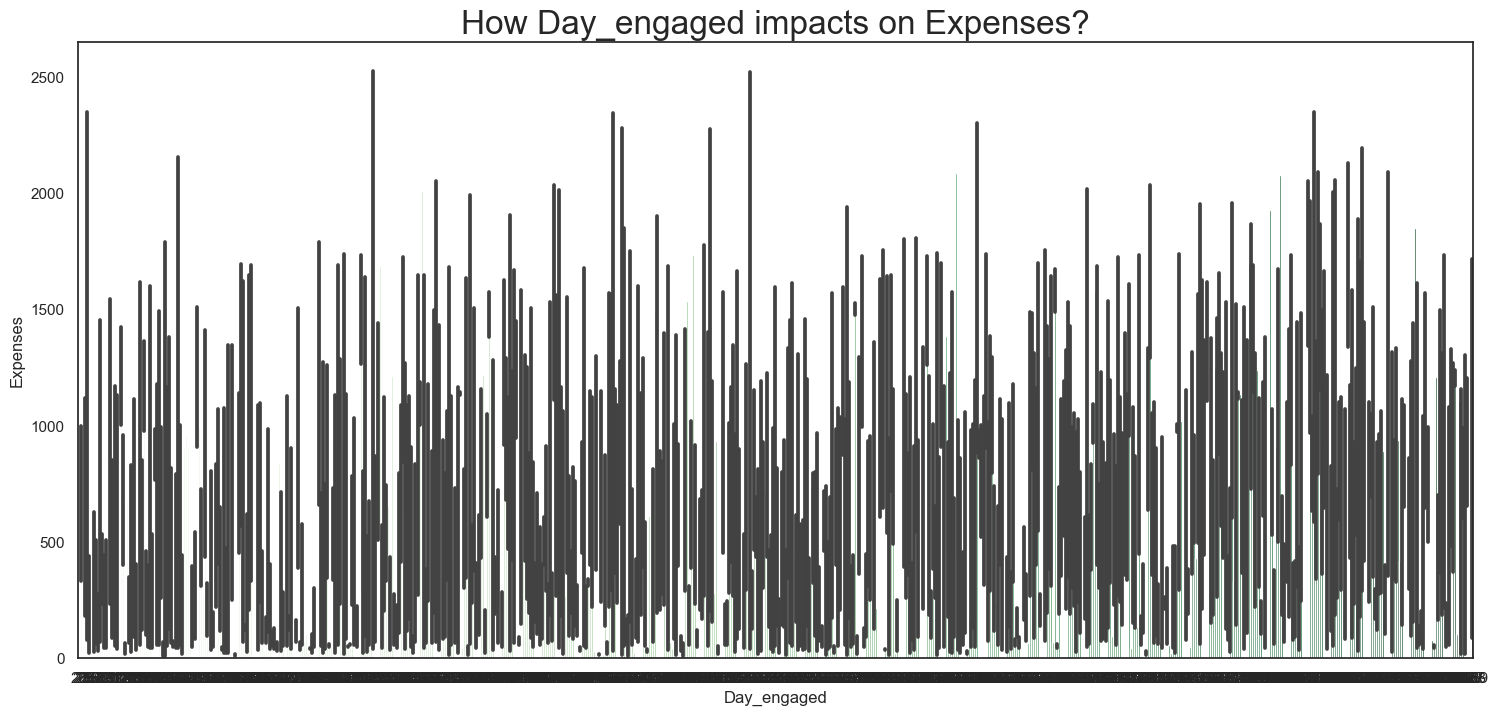

In [102]:
sns.set_theme(style="white")
plt.figure(figsize=(18,8))
plt.title("How Day_engaged impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Day_engaged", y="Expenses", data=df,palette="Greens")

In [103]:
# Age Vs Expenses

In [104]:
pd.crosstab(df['Customer Tenure'],df['Expenses'],margins=True).style.background_gradient(cmap='Greens')

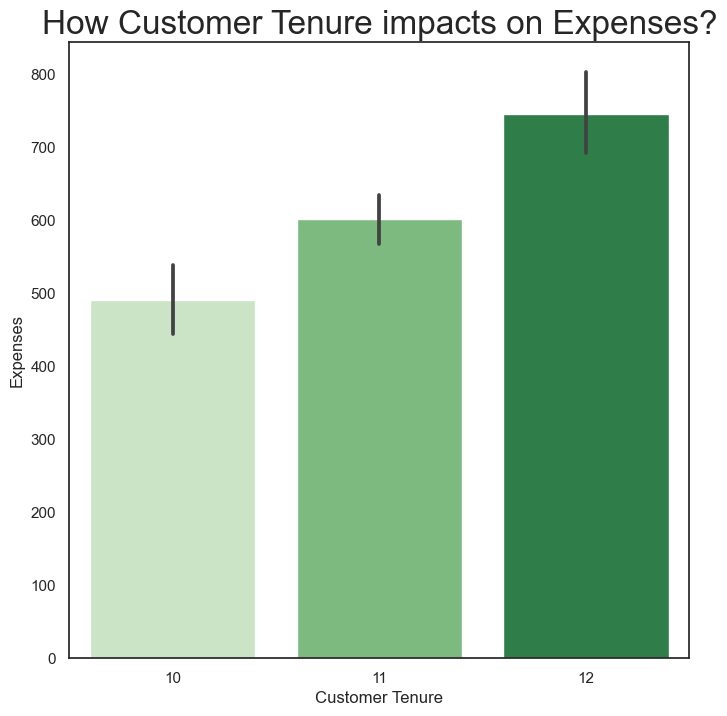

In [105]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Customer Tenure impacts on Expenses?",fontsize=24)
ax = sns.barplot(x="Customer Tenure", y="Expenses", data=df,palette="Greens")

In [106]:
df.head().style.background_gradient(cmap='Greens')

In [107]:
df.describe(include = 'all').style.background_gradient(cmap='Greens')

In [108]:
#FInd the correlation

<Axes: >

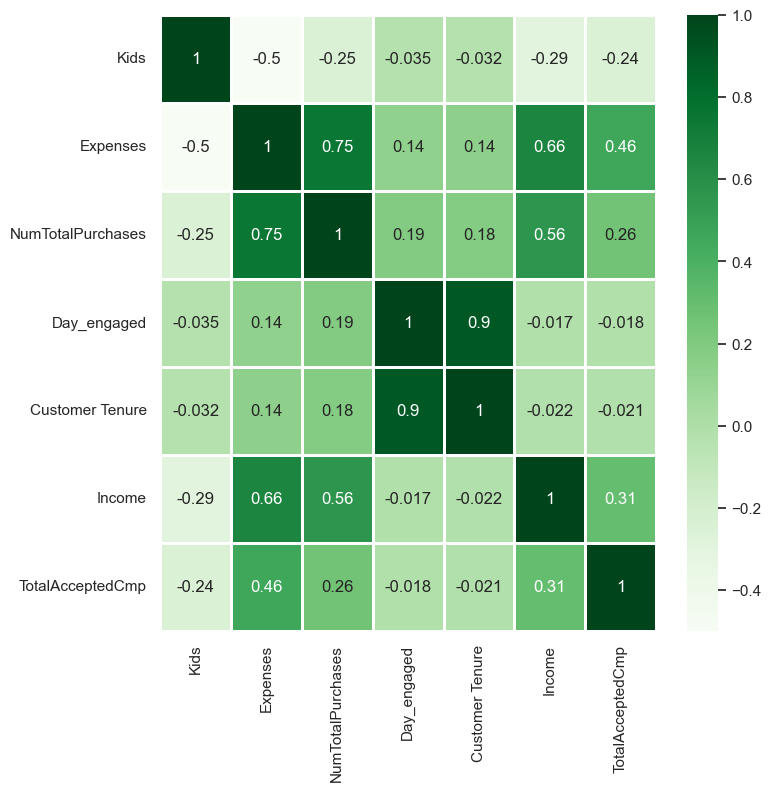

In [109]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='Greens',linewidths=2)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   object 
 1   Marital_Status     2240 non-null   object 
 2   Kids               2240 non-null   int64  
 3   Expenses           2240 non-null   int64  
 4   NumTotalPurchases  2240 non-null   int64  
 5   Day_engaged        2240 non-null   int64  
 6   Customer Tenure    2240 non-null   int64  
 7   Income             2240 non-null   float64
 8   TotalAcceptedCmp   2240 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 157.6+ KB


In [111]:
df.head(10).style.background_gradient(cmap='Greens')

In [113]:
# INSIGHT
"""1. More than 97% of the customers are "Post Graduate".
2. More than half of the cusomer are in relationship about 64.4%.
3. Maximum income - 666666
4. Minimum income - 1730
5. Mean of income - 52238
6. Approx half of the customer have 1 kid 
7. 28.4% customer have no kid
8. Maximum expenses - 2525
9. Minimum expenses - 5
10. Mean expenses - 605.7
11. 79.33% of customer accept offer in campaign 0.
12. Maximum no. of total purchases - 44
13. Minimum no. of total purchases - 0
14. Mean no. of total purchases - 14.8
15. 53% of customer are connected from last 11 years.
16. 24.8% of customers are connected from 10 years and 22% are from last 12 years.
17. The highest Expenses rate for Post Graduated Customers is 97.58%.
18.  The highest Expenses rate for Customers who are in a Relationship is 64.46%.
19.  The highest Expenses rate for Customers who have one Kid is 50.35%.
20.  The highest Expenses rate for Customers who accepted the offer in the campaign "0" is 79.33%.
21.  The highest Expenses rate for 11 years Customers tenure is 53.08%."""

'1. More than 97% of the customers are "Post Graduate".\n2. More than half of the cusomer are in relationship about 64.4%.\n3. Maximum income - 666666\n4. Minimum income - 1730\n5. Mean of income - 52238\n6. Approx half of the customer have 1 kid \n7. 28.4% customer have no kid\n8. Maximum expenses - 2525\n9. Minimum expenses - 5\n10. Mean expenses - 605.7\n11. 79.33% of customer accept offer in campaign 0.\n12. Maximum no. of total purchases - 44\n13. Minimum no. of total purchases - 0\n14. Mean no. of total purchases - 14.8\n15. 53% of customer are connected from last 11 years.\n16. 24.8% of customers are connected from 10 years and 22% are from last 12 years.\n17. The highest Expenses rate for Post Graduated Customers is 97.58%.\n18.  The highest Expenses rate for Customers who are in a Relationship is 64.46%.\n19.  The highest Expenses rate for Customers who have one Kid is 50.35%.\n20.  The highest Expenses rate for Customers who accepted the offer in the campaign "0" is 79.33%.\n